In [1]:
#Mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Reading CSV file into dataframe
import pandas as pd
path = "/content/drive/MyDrive/Colab Notebooks/"
df = pd.read_csv(path+"Motor_Vehicle_Collisions_-_Vehicles.csv")
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Extracting data from 1st November 2018 to 31st october 2020
start_date = '2018-11-01'
end_date = '2020-10-31'
mvc_data = df.loc[(df['CRASH_DATE'] >= start_date) & (df['CRASH_DATE'] <= end_date)]

In [4]:
#Storing the extracted data
mvc_data.to_csv(path+'MVC.csv')

In [5]:
#loading stored data in to dataframe and selecting requried rows
d3= pd.read_csv(path+"MVC.csv")[["UNIQUE_ID","CRASH_DATE","CRASH_TIME","VEHICLE_TYPE","VEHICLE_MAKE"]]
d3['CRASH_DATE'] = pd.to_datetime(d3['CRASH_DATE'])
#droping Empty coloums
d = d3.dropna(subset=['VEHICLE_MAKE'])

In [6]:
#Problem 1-Selecting small samples
d_sample = d.sample(n= 5000, random_state=1252000).reset_index().drop('index', axis=1)

In [ ]:
d_sample

,UNIQUE_ID,CRASH_DATE,CRASH_TIME,VEHICLE_TYPE,VEHICLE_MAKE
0,18865693,2018-12-24,16:42,Sedan,NISS -CAR/SUV
1,18958421,2019-06-03,22:20,Sedan,HOND -CAR/SUV
2,18804731,2018-11-16,8:40,Sedan,HOND -CAR/SUV
3,19091500,2019-09-13,8:22,Bus,IC
4,19773544,2020-10-14,8:25,Bus,NYC BUS NE/FL
5,18580012,2019-03-17,13:20,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV
6,19665656,2019-12-15,11:25,Pick-up Truck,CHEV -CAR/SUV
7,19587535,2020-03-05,8:10,Sedan,VOLK -CAR/SUV
8,18388542,2019-02-09,14:55,Station Wagon/Sport Utility Vehicle,LEXS -CAR/SUV
9,19044104,2019-08-06,19:30,Station Wagon/Sport Utility Vehicle,SUBA -CAR/SUV


In [ ]:
#Creating numpy array to count no of accidents for particular make
count = {'vehicle_make': ['TOYT', 'ISU', 'INFI', 'VOLV'], 
         '2018': [0, 0, 0, 0],
         '2019': [0, 0, 0, 0],
         '2020': [0, 0, 0, 0]}
count_df = pd.DataFrame(data=count)

In [ ]:
#counting No of accidents for sample data
for index,row in d_sample.iterrows():
  i = str(row["CRASH_DATE"].year)
  if row["VEHICLE_MAKE"].find('TOYT') >= 0 :
    count_df.at[0,i] = count_df.iloc[0][i]+1
  elif row['VEHICLE_MAKE'].find('ISU') >= 0 :
    count_df.at[1,i] = count_df.iloc[1][i]+1
  elif row['VEHICLE_MAKE'].find('INFI') >= 0:
    count_df.at[2,i] = count_df.iloc[2][i]+1
  elif row['VEHICLE_MAKE'].find('VOLV') >= 0:
    count_df.at[3,i] = count_df.iloc[3][i]+1

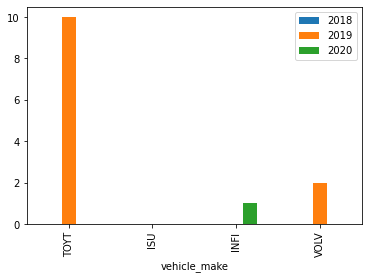

In [ ]:
count_df.plot(kind = 'bar', x='vehicle_make')

In [ ]:
#Counting No of accidents for entire data
for index,row in d.iterrows():
  i = str(row["CRASH_DATE"].year)
  if row["VEHICLE_MAKE"].find('TOYT') >= 0 :
    count_df.at[0,i] = count_df.iloc[0][i]+1
  elif row['VEHICLE_MAKE'].find('ISU') >= 0 :
    count_df.at[1,i] = count_df.iloc[1][i]+1
  elif row['VEHICLE_MAKE'].find('INFI') >= 0:
    count_df.at[2,i] = count_df.iloc[2][i]+1
  elif row['VEHICLE_MAKE'].find('VOLV') >= 0:
    count_df.at[3,i] = count_df.iloc[3][i]+1

In [ ]:
count_df

,vehicle_make,2018,2019,2020
0,TOYT,13322,68611,25946
1,ISU,342,2041,687
2,INFI,1394,7625,3532
3,VOLV,393,2312,934


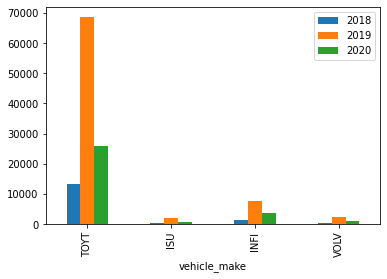

In [ ]:
#ploting Bar graph
count_df.plot(kind = 'bar', x='vehicle_make')

In [ ]:
#Problem 2
#Creating numpy array to count no of accidents in each month
count_month = {'months': ['JAN', 'FEB', 'MARCH', 'APR', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], 
               'TOYT': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               'ISU': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               'INFI': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               'VOLV': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
count_df_month = pd.DataFrame(data=count_month)

In [ ]:
#counting accidents on sample data
d2_sample = d_sample
#counting no of accidents
for index,row in d2_sample.iterrows():
  i = row["CRASH_DATE"].month
  if row["VEHICLE_MAKE"].find('TOYT') >= 0 :
    count_df_month.at[i-1,'TOYT'] =count_df_month.iloc[i-1]['TOYT']+1
  elif row["VEHICLE_MAKE"].find('ISU') >= 0 :
    count_df_month.at[i-1,'ISU'] =count_df_month.iloc[i-1]['ISU']+1
  elif row["VEHICLE_MAKE"].find('INFI') >= 0 :
    count_df_month.at[i-1,'INFI'] =count_df_month.iloc[i-1]['INFI']+1
  elif row["VEHICLE_MAKE"].find('VOLV') >= 0 :
    count_df_month.at[i-1,'VOLV'] =count_df_month.iloc[i-1]['VOLV']+1

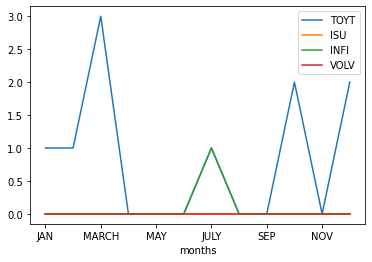

In [ ]:
#ploting Bar graph
count_df_month.plot(kind = 'line', x='months')

In [ ]:
#counting accidents on original data
#counting no of accidents
for index,row in d.iterrows():
  i = row["CRASH_DATE"].month
  if row["VEHICLE_MAKE"].find('TOYT') >= 0 :
    count_df_month.at[i-1,'TOYT'] =count_df_month.iloc[i-1]['TOYT']+1
  elif row["VEHICLE_MAKE"].find('ISU') >= 0 :
    count_df_month.at[i-1,'ISU'] =count_df_month.iloc[i-1]['ISU']+1
  elif row["VEHICLE_MAKE"].find('INFI') >= 0 :
    count_df_month.at[i-1,'INFI'] =count_df_month.iloc[i-1]['INFI']+1
  elif row["VEHICLE_MAKE"].find('VOLV') >= 0 :
    count_df_month.at[i-1,'VOLV'] =count_df_month.iloc[i-1]['VOLV']+1

In [ ]:
count_df_month

,months,TOYT,ISU,INFI,VOLV
0,JAN,10365,265,1080,352
1,FEB,9896,270,1100,285
2,MARCH,9119,267,1075,311
3,APR,6520,183,782,225
4,MAY,7779,224,943,259
5,JUNE,8160,231,987,262
6,JULY,7995,240,1031,304
7,AUG,7791,231,993,256
8,SEP,7714,233,981,291
9,OCT,8076,244,958,318


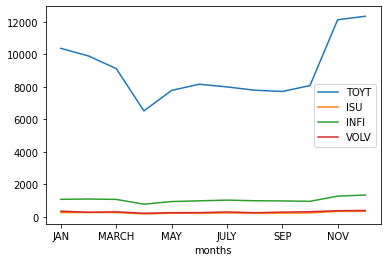

In [ ]:
#ploting Bar graph
count_df_month.plot(kind ='line',x='months')

In [7]:
#counting accidents on data of different vehicle types
vehicle_type = {'VEHICLE_TYPE' : ['Sedans', 'PASSENGER VEHICLE', 'Sport Utility Vehicle', 'Taxi', 'VAN', 'Bike', 'Bus', 'Truck', 'Bicycle', 'Motorcycle'], 'COUNT' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
count_vehicle_type = pd.DataFrame(data=vehicle_type)

In [8]:
d3 = d3.dropna(subset=['VEHICLE_TYPE'])[["UNIQUE_ID","VEHICLE_TYPE"]]
d3= d3.replace({'VEHICLE_TYPE': {'Sedan': 'Sedans','4 dr sedan': 'Sedans','2 dr sedan': 'Sedans',
                                             'SPORT UTILITY / STATION WAGON': 'Sport Utility Vehicle',
                                             'Station Wagon/Sport Utility Vehicle': 'Sport Utility Vehicle',
                                             'TAXI': 'Taxi', 'Pick-up Truck': 'Truck','Box Truck':'Truck'}})
for index,row in d3.iterrows():
  i = count_vehicle_type.index[count_vehicle_type['VEHICLE_TYPE'] == row['VEHICLE_TYPE']]
  count_vehicle_type.at[i,'COUNT'] = count_vehicle_type.iloc[i]['COUNT']+1;
count_vehicle_type= count_vehicle_type.set_index('VEHICLE_TYPE')

In [9]:
count_vehicle_type

,COUNT
VEHICLE_TYPE,
Sedans,285837
PASSENGER VEHICLE,0
Sport Utility Vehicle,237388
Taxi,26665
VAN,0
Bike,11354
Bus,10291
Truck,34318
Bicycle,0


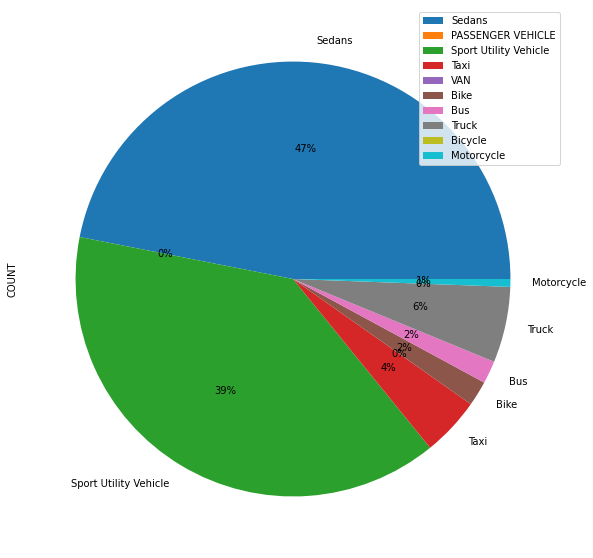

In [12]:
count_vehicle_type.plot.pie(y='COUNT',figsize=(10, 10),autopct='%1.0f%%')